<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

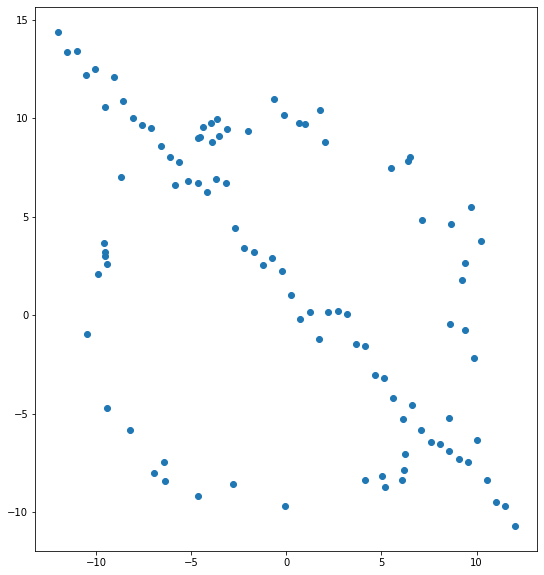

In [4]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt


#np.random.seed(0)
M= 100
half_m = M//2
R = 10
S = R/16
T = np.random.uniform(0, 2*np.pi, half_m)
n= S*np.random.randn(half_m)
x, y = (R + n)*np.cos(T), (R + n)*np.sin(T)
X_circ = np.hstack((x.reshape( half_m, 1), y.reshape(half_m, 1)))

m, q = -1, 2
x = np.linspace (-12, 12 , half_m)
y = m*x + q + S*np.random.randn(half_m)
X_line = np.hstack((x.reshape(half_m, 1 ), y.reshape(half_m, 1 )))

X = np.vstack((X_circ, X_line))

p = X[:,0] #1st column
q = X[:,1] #2nd column

#plotting the data set
plt.figure(figsize=(9, 10))
plt.plot(p, q, 'o')
plt.plot